<a href="https://colab.research.google.com/github/Kanusharma2002/Business-Analysis/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install pandas matplotlib seaborn nltk scikit-learn
!pip install --upgrade textblob # TextBlob for sentiment analysis

In [89]:
import pandas as pd

In [90]:
import matplotlib.pyplot as plt



In [91]:
import seaborn as sns


In [92]:
import re # For regular expressions


In [93]:
from nltk.corpus import stopwords


In [94]:
from nltk.tokenize import word_tokenize


In [95]:
from collections import Counter


In [96]:
from textblob import TextBlob # For sentiment analysis


In [97]:
import nltk
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
    nltk.download('punkt')

In [98]:
import pandas as pd



In [99]:
import string

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub('https?://\S+|www\.\S+', '', text) # Remove URLs
        text = re.sub('<.*?>+', '', text) # Remove HTML tags
        text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
        text = re.sub('\n', ' ', text) # Remove newlines
        text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
        return text
    return text

df['cleaned_reviews'] = df['reviews.text'].apply(clean_text)

display(df[['reviews.text', 'cleaned_reviews']].head())

,reviews.text,cleaned_reviews
0,This product so far has not disappointed. My c...,this product so far has not disappointed my ch...
1,great for beginner or experienced person. Boug...,great for beginner or experienced person bough...
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,ive had my fire hd two weeks now and i love i...
4,I bought this for my grand daughter when she c...,i bought this for my grand daughter when she c...


In [100]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                             

In [101]:
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68140 entries, 0 to 68139
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      68140 non-null  object 
 1   name                    54624 non-null  object 
 2   asins                   68136 non-null  object 
 3   brand                   68139 non-null  object 
 4   categories              68139 non-null  object 
 5   keys                    68140 non-null  object 
 6   manufacturer            68131 non-null  object 
 7   reviews.date            68056 non-null  object 
 8   reviews.dateAdded       46906 non-null  object 
 9   reviews.dateSeen        68130 non-null  object 
 10  reviews.didPurchase     14 non-null     object 
 11  reviews.doRecommend     66939 non-null  object 
 12  reviews.id              12 non-null     object 
 13  reviews.numHelpful      67074 non-null  object 
 14  review

In [102]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
id                            0
name                      13516
asins                         4
brand                         1
categories                    1
keys                          0
manufacturer                  9
reviews.date                 84
reviews.dateAdded         21234
reviews.dateSeen             10
reviews.didPurchase       68126
reviews.doRecommend        1201
reviews.id                68128
reviews.numHelpful         1066
reviews.rating               81
reviews.sourceURLs           15
reviews.text                 12
reviews.title                31
reviews.userCity          68140
reviews.userProvince      68136
reviews.username             33
cleaned_reviews              12
sentiment_polarity            0
sentiment_subjectivity        0
dtype: int64


In [103]:
df_reviews = df[['reviews.text', 'reviews.rating']].copy()


In [104]:
df_reviews.dropna(subset=['reviews.text'], inplace=True)


In [105]:
df_reviews['reviews.text_cleaned'] = df_reviews['reviews.text'].str.lower()


In [106]:
df_reviews['reviews.text_cleaned'] = df_reviews['reviews.text_cleaned'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', x)
)

In [107]:
df_reviews['reviews.text_cleaned'] = df_reviews['reviews.text_cleaned'].apply(
    lambda x: re.sub(r'\s+', ' ', x).strip()
)
print("\nSample of cleaned reviews:")
print(df_reviews[['reviews.text', 'reviews.text_cleaned']].head())


Sample of cleaned reviews:
                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                reviews.text_cleaned  
0  this product so far has not disappointed my ch...  
1  great for beginner or experienced person bough...  
2  inexpensive tablet for him to use and learn on...  
3  ive had my fire hd two weeks now and i love it...  
4  i bought this for my grand daughter when she c...  


In [108]:
stop_words = set(stopwords.words('english'))


In [109]:
import nltk
try:
    nltk.download('punkt_tab')
    print("punkt_tab resource downloaded successfully.")
except Exception as e:
    print(f"Error downloading punkt_tab: {e}")

punkt_tab resource downloaded successfully.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [110]:
df_reviews['tokenized_reviews'] = df_reviews['reviews.text_cleaned'].apply(
    lambda x: [word for word in word_tokenize(x) if word not in stop_words]
)

In [111]:
all_words = [word for tokens in df_reviews['tokenized_reviews'] for word in tokens]
word_counts = Counter(all_words)


In [112]:
print("\nTop 30 most common words in reviews (after cleaning and stop word removal):")
print(word_counts.most_common(30))


Top 30 most common words in reviews (after cleaning and stop word removal):
[('great', 23035), ('tablet', 17342), ('use', 14894), ('love', 12970), ('easy', 12081), ('amazon', 11149), ('kindle', 10442), ('bought', 9896), ('good', 9765), ('one', 9751), ('fire', 9405), ('price', 8033), ('like', 7526), ('product', 6969), ('tv', 6427), ('would', 6275), ('works', 6108), ('get', 5903), ('echo', 5709), ('much', 5469), ('music', 5424), ('read', 5382), ('kids', 5343), ('alexa', 5253), ('loves', 5185), ('well', 5044), ('apps', 5015), ('reading', 4878), ('books', 4811), ('device', 4783)]


/tmp/ipython-input-113-788607571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


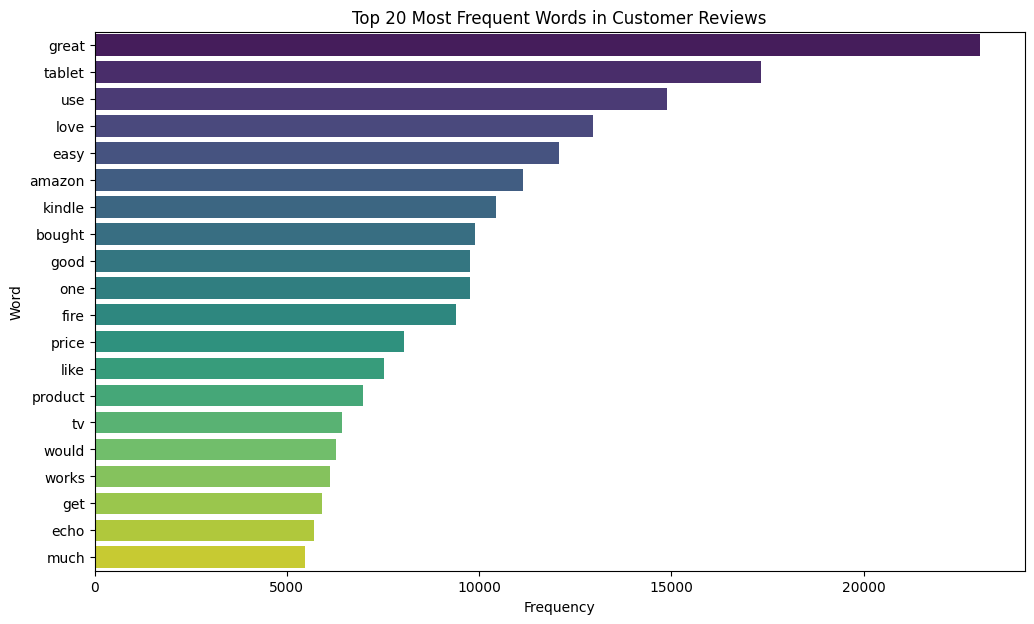

In [113]:
top_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 7))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Customer Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [114]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [115]:
df_reviews['sentiment_polarity'] = df_reviews['reviews.text_cleaned'].apply(get_sentiment)


In [116]:
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews['sentiment_category'] = df_reviews['sentiment_polarity'].apply(categorize_sentiment)

print("\nSentiment analysis results (first 5 rows):")
print(df_reviews[['reviews.text_cleaned', 'sentiment_polarity', 'sentiment_category']].head())


Sentiment analysis results (first 5 rows):
                                reviews.text_cleaned  sentiment_polarity  \
0  this product so far has not disappointed my ch...            0.325000   
1  great for beginner or experienced person bough...            0.800000   
2  inexpensive tablet for him to use and learn on...            0.600000   
3  ive had my fire hd two weeks now and i love it...            0.374583   
4  i bought this for my grand daughter when she c...            0.368056   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  


/tmp/ipython-input-117-1911767564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_reviews, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])


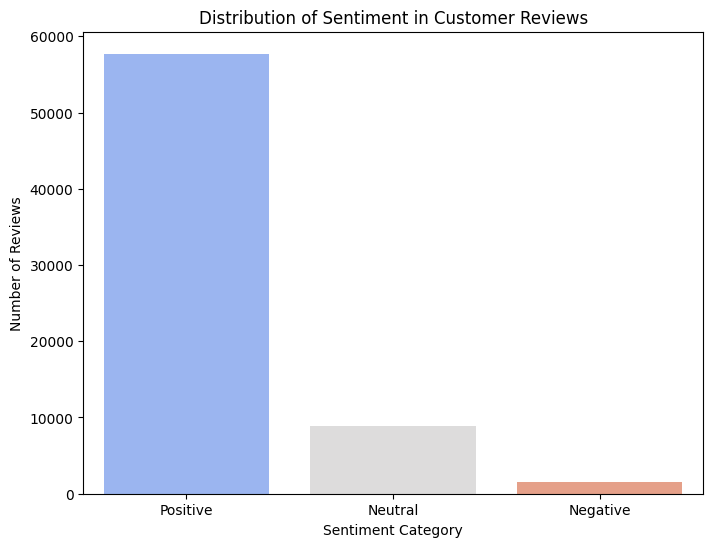

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df_reviews, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment in Customer Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

/tmp/ipython-input-118-1143790402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='reviews.rating', y='sentiment_polarity', data=df_reviews, palette='cividis')


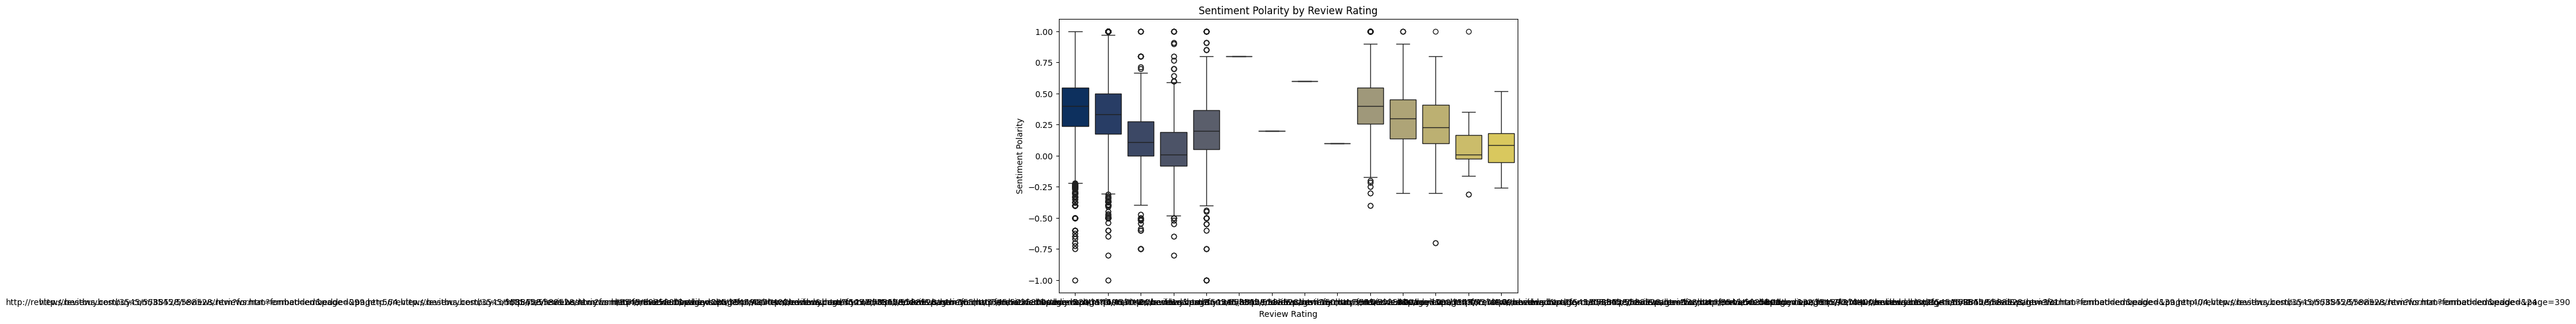

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews.rating', y='sentiment_polarity', data=df_reviews, palette='cividis')
plt.title('Sentiment Polarity by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

In [119]:
df_reviews.dropna(subset=['reviews.rating'], inplace=True)


In [120]:
df_reviews['reviews.rating'] = pd.to_numeric(df_reviews['reviews.rating'], errors='coerce')
df_reviews.dropna(subset=['reviews.rating'], inplace=True) # Drop rows where conversion failed


In [121]:
satisfied_customers = df_reviews[df_reviews['reviews.rating'] >= 4].shape[0]
total_customers = df_reviews.shape[0]

csat_score = (satisfied_customers / total_customers) * 100 if total_customers > 0 else 0

print(f"\nTotal reviews analyzed for CSAT: {total_customers}")
print(f"Number of satisfied customers (rating >= 4): {satisfied_customers}")
print(f"Customer Satisfaction Score (CSAT): {csat_score:.2f}%")



Total reviews analyzed for CSAT: 68053
Number of satisfied customers (rating >= 4): 63486
Customer Satisfaction Score (CSAT): 93.29%


/tmp/ipython-input-122-3333043155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=df_reviews, palette='magma')


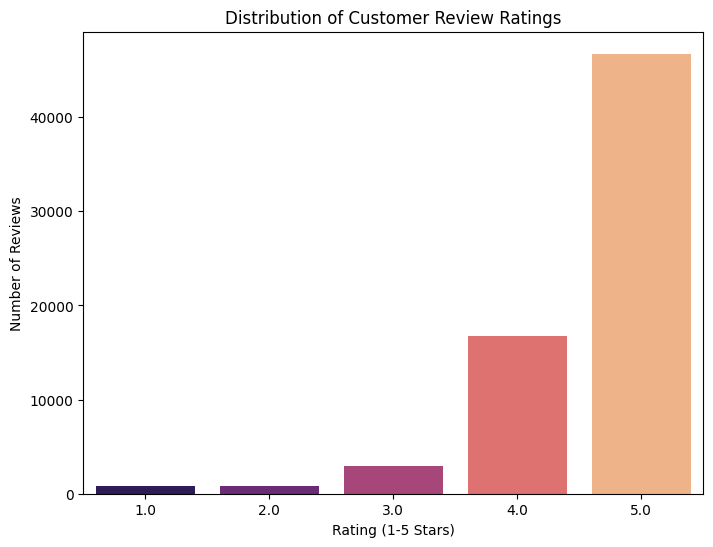

In [122]:
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews.rating', data=df_reviews, palette='magma')
plt.title('Distribution of Customer Review Ratings')
plt.xlabel('Rating (1-5 Stars)')
plt.ylabel('Number of Reviews')
plt.show()